#### Preparativos

In [ ]:
# Instalaciones
!pip install catboost

In [3]:
# Importaciones

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold, StratifiedKFold, GridSearchCV, cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostClassifier

import lightgbm as lgb
from lightgbm import LGBMClassifier


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\Diego\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\Diego\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\Diego\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_lo

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\Diego\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\Diego\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\Diego\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_lo

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



In [4]:
# Deslimitar/Limitar display Pandas

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_colwidth', None)

#### Preparación Dataset

In [5]:
# Read Matches data

df0 = pd.read_csv(r'D:\DEV\Python\00_TFM_PALLADIUM\02_DATASETS_GENERADOS\Reservas_Feature_Engineered_v1.csv', sep = ';', decimal=',')

C:\Users\Diego\AppData\Local\Temp\ipykernel_11732\2151874057.py:3: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  df0 = pd.read_csv(r'D:\DEV\Python\00_TFM_PALLADIUM\02_DATASETS_GENERADOS\Reservas_Feature_Engineered_v1.csv', sep = ';', decimal=',')


In [6]:
df0.head()

,ID_RESERVA,ID_HOTEL,HOTEL,LLEGADA,LLEGADA_ANO,LLEGADA_MES,LLEGADA_DIAm,LLEGADA_DIAs,LLEGADA_AVANCE,SALIDA,SALIDA_ANO,SALIDA_MES,SALIDA_DIAm,SALIDA_DIAs,SALIDA_AVANCE,NOCHES,DURACION_ESTANCIA,REGIMEN,ID_TIPO,TIPO,USO,PAX_NUM,PAX_CAT,ADULTOS,NENES,BEBES,ID_CLIENTE,TIPO_CLIENTE,CLIENTE,GRUPO,ID_MONEDA,MONEDA,STATUS,MOTIVO,CHECKIN,SUPLETORIA,CUNAS,FECHA_TOMA,FECHA_TOMA_ANO,FECHA_TOMA_MES,FECHA_TOMA_DIAm,FECHA_TOMA_DIAs,FECHA_TOMA_AVANCE,FECHA_MOD,FECHA_MOD_ANO,FECHA_MOD_MES,FECHA_MOD_DIAm,FECHA_MOD_DIAs,FECHA_MOD_AVANCE,FECHA_CANCELACION,FECHA_CANCELACION_ANO,FECHA_CANCELACION_MES,FECHA_CANCELACION_DIAm,FECHA_CANCELACION_DIAs,FECHA_CANCELACION_AVANCE,LT_TOMA_LLEGADA,LT_TOMA_CANCELACION,ID_FIDELIDAD,FIDELIDAD,VALHAB,VALPEN,VALSERV,VALFIJOS,COMERCIALIZADORA,CMVALHAB,CMVALPEN,CMCVALSERV,VALOR_USD,VALOR_USD_PAX,VALOR_USD_NOCHE,VALOR_USD_PAX_NOCHE,AUTORIZO,GRATIS,PAIS,CONTINENTE,SEGMENTO,FUENTE_NEGOCIO,CANCELADA
0,456094009201,92,GrandPalladiumJamaica&LadyHamiltonResort,2022-12-28,2022,12,28,3,0.989041095890411,2023-01-04,2023,1,4,3,0.00821917808219178,7,Media,AllInclusive,23300,LHAmbassadorSuiteBSOV,2,3,Familias,2,1,0,19686200,1,PALLADIUMTRAVELCLUB_SOCIOS,0,700,USD,1,DESCONOCIDO_0,1,0,0,2022-01-13,2022,1,13,4,0.03287671232876712,2022-12-28,2022,12.0,28.0,3.0,0.989041095890411,NaN,NaT,NaN,NaN,NaN,NaN,349,NaN,0,Ninguna,1868.0,708.0,0.0,0.0,0,1868.0,708.0,0.0,2576.0,858.6666666666666,368.0,122.66666666666666,1,0,ESTADOSUNIDOS,AMERICA,Fixedrates,DIRECTSALES,0
1,425835909201,92,GrandPalladiumJamaica&LadyHamiltonResort,2022-01-22,2022,1,22,6,0.057534246575342465,2022-01-29,2022,1,29,6,0.07671232876712329,7,Media,AllInclusive,43800,LHJuniorSuiteGV,2,3,Familias,2,1,0,19686200,1,PALLADIUMTRAVELCLUB_SOCIOS,0,700,USD,3,DESCONOCIDO_0,0,0,0,2021-07-13,2021,7,13,2,0.5287671232876713,2022-01-20,2022,1.0,20.0,4.0,0.052054794520547946,2022-01-20,2022,1.0,20.0,4.0,0.052054794520547946,193,191.0,0,Ninguna,1329.3,665.0,0.0,0.0,0,1329.3,665.0,0.0,1994.3,664.7666666666667,284.9,94.96666666666667,1,0,ESTADOSUNIDOS,AMERICA,Fixedrates,DIRECTSALES,1
2,549929510601,106,ComplejoRivieraMaya,2023-11-06,2023,11,6,1,0.8465753424657534,2023-11-14,2023,11,14,2,0.8684931506849315,8,Media,AllInclusive,42000,TRSJuniorSuitePS,2,2,Parejas,2,0,0,19686200,1,PALLADIUMTRAVELCLUB_SOCIOS,0,700,USD,3,DESCONOCIDO_0,0,0,0,2023-04-17,2023,4,17,1,0.29041095890410956,2023-11-07,2023,11.0,7.0,2.0,0.8493150684931506,2023-10-17,2023,10.0,17.0,2.0,0.7917808219178082,203,183.0,0,Ninguna,1146.56,1146.56,0.0,12.48,0,1146.56,1146.56,0.0,2305.6,1152.8,288.2,144.1,1,0,CANADA,AMERICA,Fixedrates,DIRECTSALES,1
3,519229110601,106,ComplejoRivieraMaya,2023-11-06,2023,11,6,1,0.8465753424657534,2023-11-23,2023,11,23,4,0.8931506849315068,17,Larga,AllInclusive,42000,TRSJuniorSuitePS,2,2,Parejas,2,0,0,19686200,1,PALLADIUMTRAVELCLUB_SOCIOS,0,700,USD,3,DESCONOCIDO_0,0,0,0,2023-02-22,2023,2,22,3,0.14246575342465753,2023-11-07,2023,11.0,7.0,2.0,0.8493150684931506,2023-09-14,2023,9.0,14.0,4.0,0.7013698630136986,257,204.0,0,Ninguna,2436.44,2436.44,0.0,26.52,0,2436.44,2436.44,0.0,4899.400000000001,2449.7000000000003,288.20000000000005,144.10000000000002,1,0,ESTADOSUNIDOS,AMERICA,Fixedrates,DIRECTSALES,1
4,537405910601,106,ComplejoRivieraMaya,2023-11-25,2023,11,25,6,0.8986301369863013,2023-12-09,2023,12,9,6,0.936986301369863,14,Larga,AllInclusive,13000,COLJuniorSuiteGV,1,1,Single,1,0,0,19686200,1,PALLADIUMTRAVELCLUB_SOCIOS,0,700,USD,3,DESCONOCIDO_0,0,0,0,2023-02-17,2023,2,17,5,0.12876712328767123,2023-11-26,2023,11.0,26.0,7.0,0.9013698630136986,2023-04-11,2023,4.0,11.0,2.0,0.273972602739726,281,53.0,0,Ninguna,2413.18,0.0,0.0,21.84,0,2413.18,0.0,0.0,2435.02,2435.02,173.93,173.93,1,0,RUMANIA,EURESTE,Fixedrates,DIRECTSALES,1


In [7]:
df0.columns

Index(['ID_RESERVA', 'ID_HOTEL', 'HOTEL', 'LLEGADA', 'LLEGADA_ANO',
       'LLEGADA_MES', 'LLEGADA_DIAm', 'LLEGADA_DIAs', 'LLEGADA_AVANCE',
       'SALIDA', 'SALIDA_ANO', 'SALIDA_MES', 'SALIDA_DIAm', 'SALIDA_DIAs',
       'SALIDA_AVANCE', 'NOCHES', 'DURACION_ESTANCIA', 'REGIMEN', 'ID_TIPO',
       'TIPO', 'USO', 'PAX_NUM', 'PAX_CAT', 'ADULTOS', 'NENES', 'BEBES',
       'ID_CLIENTE', 'TIPO_CLIENTE', 'CLIENTE', 'GRUPO', 'ID_MONEDA', 'MONEDA',
       'STATUS', 'MOTIVO', 'CHECKIN', 'SUPLETORIA', 'CUNAS', 'FECHA_TOMA',
       'FECHA_TOMA_ANO', 'FECHA_TOMA_MES', 'FECHA_TOMA_DIAm',
       'FECHA_TOMA_DIAs', 'FECHA_TOMA_AVANCE', 'FECHA_MOD', 'FECHA_MOD_ANO',
       'FECHA_MOD_MES', 'FECHA_MOD_DIAm', 'FECHA_MOD_DIAs', 'FECHA_MOD_AVANCE',
       'FECHA_CANCELACION', 'FECHA_CANCELACION_ANO', 'FECHA_CANCELACION_MES',
       'FECHA_CANCELACION_DIAm', 'FECHA_CANCELACION_DIAs',
       'FECHA_CANCELACION_AVANCE', 'LT_TOMA_LLEGADA', 'LT_TOMA_CANCELACION',
       'ID_FIDELIDAD', 'FIDELIDAD', 'VALHAB', '

In [8]:
# Cuando nos pongamos con modelos que acepten valores categóricos, convendrá pasar algunos int a category
# Ahora lo mantendremos así para poder trabajar con modelos simples

#### Preparación de un DF Mixto para CatBoost Básico

In [9]:
df_mix = df0.copy()

In [10]:
# Reconfigurar dtypes

df_mix.drop(columns=['ID_RESERVA'], inplace=True) # No usar, ID
df_mix.drop(columns=['ID_HOTEL'], inplace=True) # No usar, ID
df_mix['HOTEL'] = df_mix['HOTEL'].astype('category', errors='raise')
df_mix.drop(columns=['LLEGADA'], inplace=True) # No usar, contamina extrapolación
df_mix.drop(columns=['LLEGADA_ANO'], inplace=True) # No usar, contamina extrapolación
df_mix['LLEGADA_MES'] = pd.to_numeric(df_mix['LLEGADA_MES'], errors='raise').astype('category')
df_mix['LLEGADA_DIAm'] = pd.to_numeric(df_mix['LLEGADA_DIAm'], errors='raise').astype('category')
df_mix['LLEGADA_DIAs'] = pd.to_numeric(df_mix['LLEGADA_DIAs'], errors='raise').astype('category')
df_mix['LLEGADA_AVANCE'] = pd.to_numeric(df_mix['LLEGADA_AVANCE'], errors='raise').astype(float)
df_mix.drop(columns=['SALIDA'], inplace=True) # No usar, contamina extrapolación
df_mix.drop(columns=['SALIDA_ANO'], inplace=True) # No usar, contamina extrapolación
df_mix['SALIDA_MES'] = pd.to_numeric(df_mix['SALIDA_MES'], errors='raise').astype('category')
df_mix['SALIDA_DIAm'] = pd.to_numeric(df_mix['SALIDA_DIAm'], errors='raise').astype('category')
df_mix['SALIDA_DIAs'] = pd.to_numeric(df_mix['SALIDA_DIAs'], errors='raise').astype('category')
df_mix['SALIDA_AVANCE'] = pd.to_numeric(df_mix['SALIDA_AVANCE'], errors='raise').astype(float)
df_mix['NOCHES'] = pd.to_numeric(df_mix['NOCHES'], errors='raise').astype('Int64')
df_mix['DURACION_ESTANCIA'] = df_mix['DURACION_ESTANCIA'].astype('category', errors='raise')
df_mix['REGIMEN'] = df_mix['REGIMEN'].astype('category', errors='raise')
df_mix.drop(columns=['ID_TIPO'], inplace=True) # No usar, ID
df_mix['TIPO'] = df_mix['TIPO'].astype('category', errors='raise')
df_mix['USO'] = pd.to_numeric(df_mix['USO'], errors='raise').astype('Int64')
df_mix['PAX_NUM'] = pd.to_numeric(df_mix['PAX_NUM'], errors='raise').astype('Int64')
df_mix['PAX_CAT'] = df_mix['PAX_CAT'].astype('category', errors='raise')
df_mix['ADULTOS'] = pd.to_numeric(df_mix['ADULTOS'], errors='raise').astype('Int64')
df_mix['NENES'] = pd.to_numeric(df_mix['NENES'], errors='raise').astype('Int64')
df_mix['BEBES'] = pd.to_numeric(df_mix['BEBES'], errors='raise').astype('Int64')
df_mix.drop(columns=['ID_CLIENTE'], inplace=True) # No usar, ID
df_mix['TIPO_CLIENTE'] = pd.to_numeric(df_mix['TIPO_CLIENTE'], errors='raise').astype('category')
df_mix['CLIENTE'] = df_mix['CLIENTE'].astype('category', errors='raise')
df_mix['GRUPO'] = pd.to_numeric(df_mix['GRUPO'], errors='raise').astype('category')
df_mix.drop(columns=['ID_MONEDA'], inplace=True) # No usar, ID
df_mix['MONEDA'] = df_mix['MONEDA'].astype('category', errors='raise')
df_mix.drop(columns=['STATUS'], inplace=True) # No usar, redundante con variable objetivo
df_mix.drop(columns=['MOTIVO'], inplace=True) # No usar, imposible ver el futuro
df_mix.drop(columns=['CHECKIN'], inplace=True) # No usar, imposible ver el futuro
df_mix['SUPLETORIA'] = pd.to_numeric(df_mix['SUPLETORIA'], errors='raise').astype('Int64')
df_mix['CUNAS'] = pd.to_numeric(df_mix['CUNAS'], errors='raise').astype('Int64')
df_mix.drop(columns=['FECHA_TOMA'], inplace=True) # No usar, contamina extrapolación
df_mix.drop(columns=['FECHA_TOMA_ANO'], inplace=True) # No usar, contamina extrapolación
df_mix['FECHA_TOMA_MES'] = pd.to_numeric(df_mix['FECHA_TOMA_MES'], errors='raise').astype('category')
df_mix['FECHA_TOMA_DIAm'] = pd.to_numeric(df_mix['FECHA_TOMA_DIAm'], errors='raise').astype('category')
df_mix['FECHA_TOMA_DIAs'] = pd.to_numeric(df_mix['FECHA_TOMA_DIAs'], errors='raise').astype('category')
df_mix['FECHA_TOMA_AVANCE'] = pd.to_numeric(df_mix['FECHA_TOMA_AVANCE'], errors='raise').astype(float)
df_mix.drop(columns=['FECHA_MOD'], inplace=True) # No usar, contamina extrapolación, imposible ver el futuro
df_mix.drop(columns=['FECHA_MOD_ANO'], inplace=True) # No usar, contamina extrapolación, imposible ver el futuro
df_mix.drop(columns=['FECHA_MOD_MES'], inplace=True) # No usar, imposible ver el futuro
df_mix.drop(columns=['FECHA_MOD_DIAm'], inplace=True) # No usar, imposible ver el futuro
df_mix.drop(columns=['FECHA_MOD_DIAs'], inplace=True) # No usar, imposible ver el futuro
df_mix.drop(columns=['FECHA_MOD_AVANCE'], inplace=True) # No usar, imposible ver el futuro
df_mix.drop(columns=['FECHA_CANCELACION'], inplace=True) # No usar, contamina extrapolación, imposible ver el futuro
df_mix.drop(columns=['FECHA_CANCELACION_ANO'], inplace=True) # No usar, contamina extrapolación, imposible ver el futuro
df_mix.drop(columns=['FECHA_CANCELACION_MES'], inplace=True) # No usar, imposible ver el futuro
df_mix.drop(columns=['FECHA_CANCELACION_DIAm'], inplace=True) # No usar, imposible ver el futuro
df_mix.drop(columns=['FECHA_CANCELACION_DIAs'], inplace=True) # No usar, imposible ver el futuro
df_mix.drop(columns=['FECHA_CANCELACION_AVANCE'], inplace=True) # No usar, imposible ver el futuro
df_mix['LT_TOMA_LLEGADA'] = pd.to_numeric(df_mix['LT_TOMA_LLEGADA'], errors='raise').astype('Int64')
df_mix.drop(columns=['LT_TOMA_CANCELACION'], inplace=True) # No usar, imposible ver el futuro
df_mix.drop(columns=['ID_FIDELIDAD'], inplace=True) # No usar, ID
df_mix['FIDELIDAD'] = df_mix['FIDELIDAD'].astype('category', errors='raise')
df_mix.drop(columns=['VALHAB'], inplace=True) # No usar, no está convertido y teniendo el valor total es redundante y/o dependiente de COMERCIALIZADORA
df_mix.drop(columns=['VALPEN'], inplace=True) # No usar, no está convertido y teniendo el valor total es redundante y/o dependiente de COMERCIALIZADORA
df_mix.drop(columns=['VALSERV'], inplace=True) # No usar, no está convertido y teniendo el valor total es redundante y/o dependiente de COMERCIALIZADORA
df_mix.drop(columns=['VALFIJOS'], inplace=True) # No usar, no está convertido y teniendo el valor total es redundante y/o dependiente de COMERCIALIZADORA
df_mix['COMERCIALIZADORA'] = pd.to_numeric(df_mix['COMERCIALIZADORA'], errors='raise').astype('category')
df_mix.drop(columns=['CMVALHAB'], inplace=True) # No usar, no está convertido y teniendo el valor total es redundante y/o dependiente de COMERCIALIZADORA
df_mix.drop(columns=['CMVALPEN'], inplace=True) # No usar, no está convertido y teniendo el valor total es redundante y/o dependiente de COMERCIALIZADORA
df_mix.drop(columns=['CMCVALSERV'], inplace=True) # No usar, no está convertido y teniendo el valor total es redundante y/o dependiente de COMERCIALIZADORA
df_mix['VALOR_USD'] = pd.to_numeric(df_mix['VALOR_USD'], errors='raise').astype(float)
df_mix['VALOR_USD_PAX'] = pd.to_numeric(df_mix['VALOR_USD_PAX'], errors='raise').astype(float)
df_mix['VALOR_USD_NOCHE'] = pd.to_numeric(df_mix['VALOR_USD_NOCHE'], errors='raise').astype(float)
df_mix['VALOR_USD_PAX_NOCHE'] = pd.to_numeric(df_mix['VALOR_USD_PAX_NOCHE'], errors='raise').astype(float)
df_mix.drop(columns=['AUTORIZO'], inplace=True) # No usar, de momento no muy claro
df_mix['GRATIS'] = pd.to_numeric(df_mix['GRATIS'], errors='raise').astype('category')
df_mix['PAIS'] = df_mix['PAIS'].astype('category', errors='raise')
df_mix['CONTINENTE'] = df_mix['CONTINENTE'].astype('category', errors='raise')
df_mix['SEGMENTO'] = df_mix['SEGMENTO'].astype('category', errors='raise')
df_mix['FUENTE_NEGOCIO'] = df_mix['FUENTE_NEGOCIO'].astype('category', errors='raise')
df_mix['CANCELADA'] = pd.to_numeric(df_mix['CANCELADA'], errors='raise').astype('category')

In [11]:
df_mix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1139289 entries, 0 to 1139288
Data columns (total 42 columns):
 #   Column               Non-Null Count    Dtype   
---  ------               --------------    -----   
 0   HOTEL                1139289 non-null  category
 1   LLEGADA_MES          1139289 non-null  category
 2   LLEGADA_DIAm         1139289 non-null  category
 3   LLEGADA_DIAs         1139289 non-null  category
 4   LLEGADA_AVANCE       1139289 non-null  float64 
 5   SALIDA_MES           1139289 non-null  category
 6   SALIDA_DIAm          1139289 non-null  category
 7   SALIDA_DIAs          1139289 non-null  category
 8   SALIDA_AVANCE        1139289 non-null  float64 
 9   NOCHES               1139289 non-null  Int64   
 10  DURACION_ESTANCIA    1139289 non-null  category
 11  REGIMEN              1139289 non-null  category
 12  TIPO                 1139289 non-null  category
 13  USO                  1139289 non-null  Int64   
 14  PAX_NUM              1139289 non-n

In [12]:
X_mix = df_mix.drop(columns=['CANCELADA'])

y_mix = df_mix['CANCELADA']

X_mix_train, X_mix_test, y_mix_train, y_mix_test = train_test_split(X_mix, y_mix, test_size=0.2, random_state=42)

#### Catboost Preliminar

0:	learn: 0.6553729	total: 251ms	remaining: 24.8s
10:	learn: 0.7060657	total: 2.71s	remaining: 22s
20:	learn: 0.7112327	total: 5.2s	remaining: 19.6s
30:	learn: 0.7161865	total: 7.67s	remaining: 17.1s
40:	learn: 0.7196954	total: 10.2s	remaining: 14.6s
50:	learn: 0.7227645	total: 12.6s	remaining: 12.1s
60:	learn: 0.7257777	total: 15.1s	remaining: 9.63s
70:	learn: 0.7279854	total: 17.4s	remaining: 7.12s
80:	learn: 0.7294559	total: 19.8s	remaining: 4.65s
90:	learn: 0.7314184	total: 22.3s	remaining: 2.2s
99:	learn: 0.7329029	total: 24.5s	remaining: 0us
Accuracy: 0.7393552124568811
(array([0, 1]), array([141314,  86544]))
(array([0, 1]), array([135706,  92152]))
successes = 168468


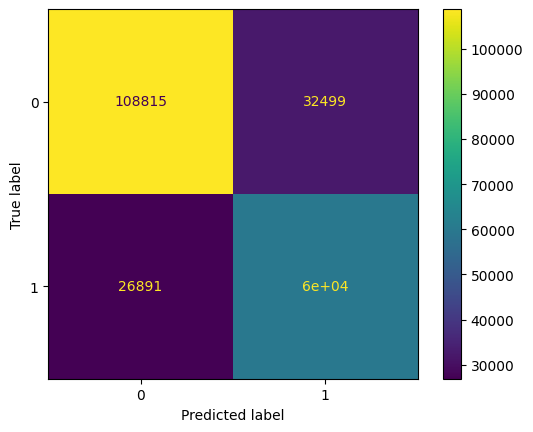

In [14]:
# CatBoost Classifier Básico v1

cat_features = X_mix.select_dtypes(include='category').columns.tolist()

modelo_CB = CatBoostClassifier(
    verbose=10,
    cat_features=cat_features,
    loss_function='Logloss',
    eval_metric='Accuracy',
    auto_class_weights='SqrtBalanced',
    random_seed=42,
    depth = 6,
    learning_rate = 0.1,
    iterations = 100,
    task_type='GPU',
    )

modelo_CB.fit(X_mix_train, y_mix_train)
y_mix_pred = modelo_CB.predict(X_mix_test)

# Accuracy como scoring
accuracy = accuracy_score(y_mix_test, y_mix_pred)
print("Accuracy:", accuracy)

# Distribución de calcelaciones, realidad vs predicciones
print(np.unique(y_mix_test, return_counts=True))
print(np.unique(y_mix_pred, return_counts=True))

# Matriz de confusión
cm = confusion_matrix(y_mix_test, y_mix_pred, labels=np.unique(y_mix_test))
print(f'successes = {np.trace(cm)}')
ConfusionMatrixDisplay.from_predictions(y_mix_test, y_mix_pred, labels=np.unique(y_mix_test))

0:	learn: 0.7122448	total: 7.96s	remaining: 13m 8s
10:	learn: 0.7734365	total: 1m 29s	remaining: 12m 6s
20:	learn: 0.7998576	total: 2m 52s	remaining: 10m 50s
30:	learn: 0.8309998	total: 4m 18s	remaining: 9m 35s
40:	learn: 0.8587979	total: 5m 45s	remaining: 8m 17s
50:	learn: 0.8845519	total: 7m 14s	remaining: 6m 57s
60:	learn: 0.9026641	total: 8m 42s	remaining: 5m 33s
70:	learn: 0.9178929	total: 10m 9s	remaining: 4m 8s
80:	learn: 0.9316306	total: 11m 37s	remaining: 2m 43s
90:	learn: 0.9411179	total: 13m 5s	remaining: 1m 17s
99:	learn: 0.9485852	total: 14m 22s	remaining: 0us
Accuracy: 0.7998402513846343
(array([0, 1]), array([141314,  86544]))
(array([0, 1]), array([147788,  80070]))
successes = 182250


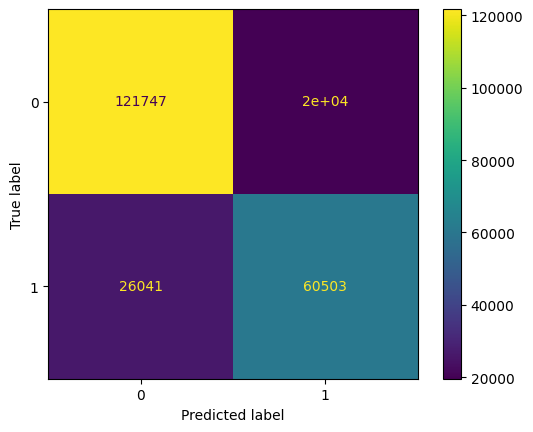

In [15]:
# CatBoost Classifier Básico v13

cat_features = X_mix.select_dtypes(include='category').columns.tolist()

modelo_CB = CatBoostClassifier(
    verbose=10,
    cat_features=cat_features,
    loss_function='Logloss',
    eval_metric='Accuracy',
    random_seed=42,
    depth = 16,
    learning_rate = 0.3,
    iterations = 100,
    task_type='GPU',
    )

modelo_CB.fit(X_mix_train, y_mix_train)
y_mix_pred = modelo_CB.predict(X_mix_test)

# Accuracy como scoring
accuracy = accuracy_score(y_mix_test, y_mix_pred)
print("Accuracy:", accuracy)

# Distribución de calcelaciones, realidad vs predicciones
print(np.unique(y_mix_test, return_counts=True))
print(np.unique(y_mix_pred, return_counts=True))

# Matriz de confusión
cm = confusion_matrix(y_mix_test, y_mix_pred, labels=np.unique(y_mix_test))
print(f'successes = {np.trace(cm)}')
ConfusionMatrixDisplay.from_predictions(y_mix_test, y_mix_pred, labels=np.unique(y_mix_test))

In [16]:
# Importancias de las variables
# Vamos a ver si cogiendo las n menos significativas agilizamos el entrenamiento y de paso podemos quitar ruido
df_importancias = pd.DataFrame({
    'feature': X_mix_train.columns,
    'importance': modelo_CB.get_feature_importance()
}).sort_values(by='importance', ascending=False)

# Mostrar top 20
print(len(df_importancias))
df_importancias.reset_index(drop=True)

41


,feature,importance
0,CLIENTE,8.386480
1,TIPO,6.710878
2,LT_TOMA_LLEGADA,6.087603
3,HOTEL,5.837552
4,FECHA_TOMA_DIAs,5.108794
5,FECHA_TOMA_DIAm,5.008200
6,PAIS,4.852933
7,SEGMENTO,4.218857
8,SALIDA_DIAm,4.056031
9,LLEGADA_DIAs,3.875671


In [17]:
# De las anteriores variables, nos queremos quedar con las n (paréntesis del head) más representativas
var_imp = df_importancias['feature'].head(15).tolist()
df_mix_imp = df_mix.copy()
df_mix_imp = df_mix_imp[var_imp]

In [18]:
X_mix_imp = df_mix_imp

y_mix_imp = df_mix['CANCELADA']

X_mix_imp_train, X_mix_imp_test, y_mix_imp_train, y_mix_imp_test = train_test_split(X_mix_imp, y_mix_imp, test_size=0.2, random_state=42)

0:	learn: 0.6722308	total: 1.62s	remaining: 2m 40s
10:	learn: 0.7417610	total: 18.1s	remaining: 2m 26s
20:	learn: 0.7560144	total: 34.4s	remaining: 2m 9s
30:	learn: 0.7677937	total: 50.7s	remaining: 1m 52s
40:	learn: 0.7804134	total: 1m 7s	remaining: 1m 37s
50:	learn: 0.7902112	total: 1m 24s	remaining: 1m 20s
60:	learn: 0.7985059	total: 1m 40s	remaining: 1m 4s
70:	learn: 0.8067500	total: 1m 57s	remaining: 47.9s
80:	learn: 0.8165478	total: 2m 13s	remaining: 31.4s
90:	learn: 0.8271729	total: 2m 31s	remaining: 15s
99:	learn: 0.8358790	total: 2m 47s	remaining: 0us
Accuracy: 0.77915192795513
(array([0, 1]), array([141314,  86544]))
(array([0, 1]), array([149486,  78372]))
successes = 177536


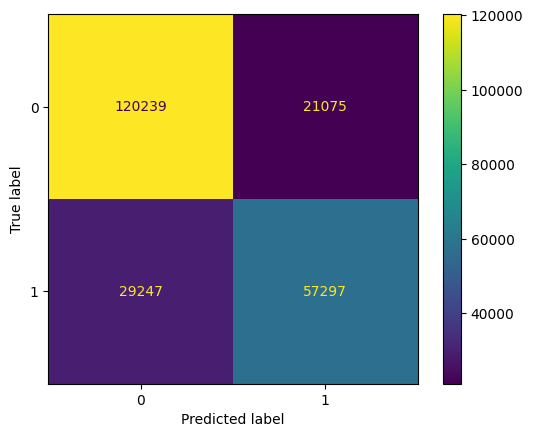

In [19]:
# CatBoost Classifier Básico Importancias

cat_features = X_mix_imp.select_dtypes(include='category').columns.tolist()

modelo_CB = CatBoostClassifier(
    verbose=10,
    cat_features=cat_features,
    loss_function='Logloss',
    eval_metric='Accuracy',
    random_seed=42,
    depth = 16,
    learning_rate = 0.3,
    iterations = 100,
    task_type='GPU',
    )

modelo_CB.fit(X_mix_imp_train, y_mix_imp_train)
y_mix_imp_pred = modelo_CB.predict(X_mix_imp_test)

# Accuracy como scoring
accuracy = accuracy_score(y_mix_imp_test, y_mix_imp_pred)
print("Accuracy:", accuracy)

# Distribución de calcelaciones, realidad vs predicciones
print(np.unique(y_mix_imp_test, return_counts=True))
print(np.unique(y_mix_imp_pred, return_counts=True))

# Matriz de confusión
cm = confusion_matrix(y_mix_imp_test, y_mix_imp_pred, labels=np.unique(y_mix_imp_test))
print(f'successes = {np.trace(cm)}')
ConfusionMatrixDisplay.from_predictions(y_mix_imp_test, y_mix_imp_pred, labels=np.unique(y_mix_imp_test))

In [20]:
# Este último, con algo menos de 3min de tiempo de cómputo, es medianamente coherente para intentar una validación cruzada con optimización de hiperparametros
# Vamos a ver qué obtenemos

In [21]:
# Preparación de la validación cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ..................iterations=125, learning_rate=0.3; total time= 3.6min
[CV] END ..................iterations=125, learning_rate=0.3; total time= 3.6min
[CV] END ..................iterations=125, learning_rate=0.3; total time= 3.6min
[CV] END ..................iterations=125, learning_rate=0.3; total time= 3.6min
[CV] END ..................iterations=125, learning_rate=0.3; total time= 3.6min
[CV] END ..................iterations=125, learning_rate=0.4; total time= 3.6min
[CV] END ..................iterations=125, learning_rate=0.4; total time= 3.6min
[CV] END ..................iterations=125, learning_rate=0.4; total time= 3.6min
[CV] END ..................iterations=125, learning_rate=0.4; total time= 3.6min
[CV] END ..................iterations=125, learning_rate=0.4; total time= 3.6min
[CV] END ..................iterations=150, learning_rate=0.3; total time= 4.3min
[CV] END ..................iterations=150, learni

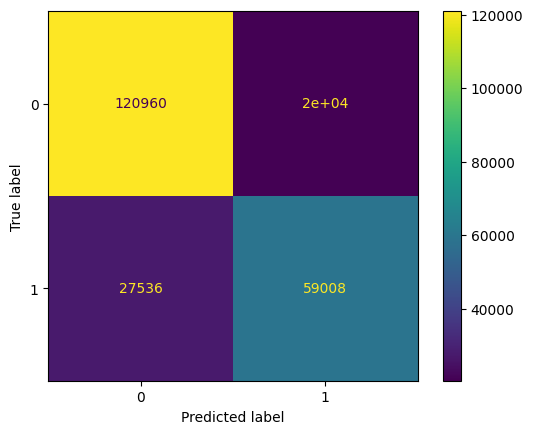

In [25]:
# CatBoost Classifier con Validación cruzada y Optimización de Hiperparámetros

cat_features = X_mix_imp.select_dtypes(include='category').columns.tolist()

modelo_cb_cv_ohp = CatBoostClassifier(
    cat_features=cat_features,
    loss_function='Logloss',
    eval_metric='Accuracy',
    random_seed=42,
    depth = 16,
    #learning_rate = 0.3,
    #iterations = 100,
    task_type='GPU',
    verbose=0,
    )

param_grid_cb_cv_ohp = {
    'learning_rate': [0.3, 0.4],
    'iterations': [125, 150],
}

grid_search_cb_cv_ohp = GridSearchCV(
    estimator=modelo_cb_cv_ohp,
    param_grid=param_grid_cb_cv_ohp,
    cv=kf,
    scoring="accuracy",
    #n_jobs=-1,
    verbose=2,
    )

grid_search_cb_cv_ohp.fit(X_mix_imp, y_mix_imp)
print(f"Best HyperParameters: {grid_search_cb_cv_ohp.best_params_}")

##############################################

# Assign
modelo_cb_cv_ohp = grid_search_cb_cv_ohp.best_estimator_

modelo_cb_cv_ohp.fit(X_mix_imp_train, y_mix_imp_train)
y_mix_imp_pred = modelo_cb_cv_ohp.predict(X_mix_imp_test)

# Accuracy como scoring
accuracy = accuracy_score(y_mix_imp_test, y_mix_imp_pred)
print("Accuracy:", accuracy)

# Distribución de calcelaciones, realidad vs predicciones
print(np.unique(y_mix_imp_test, return_counts=True))
print(np.unique(y_mix_imp_pred, return_counts=True))

# Matriz de confusión
cm = confusion_matrix(y_mix_imp_test, y_mix_imp_pred, labels=np.unique(y_mix_imp_test))
print(f'successes = {np.trace(cm)}')
ConfusionMatrixDisplay.from_predictions(y_mix_imp_test, y_mix_imp_pred, labels=np.unique(y_mix_imp_test))

In [ ]:
# Tarda muchísimo
# Pendiente ver alternativas con Gustavo